In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

In [ ]:
url = ["https://th.bing.com/th/id/OIP.L5c7fGjA6-VLjdEvaP2AcQHaE8?pid=ImgDet&rs=1",
       "https://th.bing.com/th/id/OIP.kuLrtWwXW5nqy7UaVB2N8wHaHa?pid=ImgDet&rs=1"]

image1 = io.imread(url[0])
image2 = io.imread(url[1])
image1 = cv.cvtColor(image1, cv.COLOR_BGR2RGB)
image2 = cv.cvtColor(image2, cv.COLOR_BGR2RGB)

In [ ]:
sift = cv.xfeatures2d.SIFT_create()

In [ ]:
keypoints_1, descriptors_1 = sift.detectAndCompute(image1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(image2,None)

In [ ]:
bf = cv.BFMatcher(cv.NORM_L1, crossCheck = True)
matches = bf.match(descriptors_1, descriptors_2)

In [ ]:
matches = sorted(matches, key = lambda x:x.distance)

matched_img = cv.drawMatches(image1, keypoints_1, image2, keypoints_2, matches[:50], image2, flags=2)

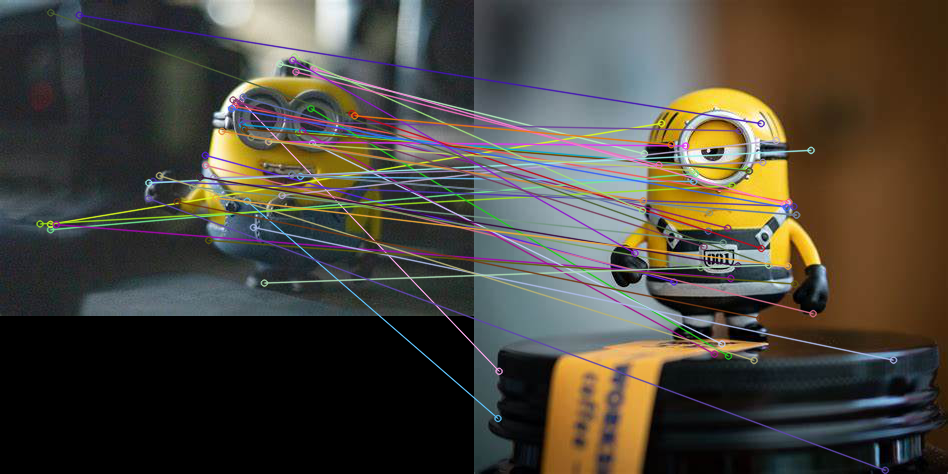

In [ ]:
cv2_imshow(matched_img)